In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('label_game_data.csv')

In [3]:
dt.head()

,QueryName,ReleaseDate,RequiredAge,DeveloperCount,DLCCount,Metacritic,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,...,PurchaseAvail,SubscriptionAvail,PriceCurrency,PriceInitial,PriceFinal,SupportedLanguages,Platforms,Categories,Genres,Recommended
0,Counter-Strike,Nov 1 2000,0,1,0,88,68991,1,13,13033334,...,1,0,USD,9.99,9.99,English French German Italian Spanish Simplifi...,"Windows, Linux, Mac",Multiplayer,Action,1
1,Team Fortress Classic,Apr 1 1999,0,1,0,0,2439,1,5,5399140,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
2,Day of Defeat,May 1 2003,0,1,0,79,2319,1,5,7621102,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
3,Deathmatch Classic,Jun 1 2001,0,1,0,0,888,1,4,7498965,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,0
4,Half-Life: Opposing Force,Nov 1 1999,0,1,0,0,2934,1,5,5399499,...,1,0,USD,4.99,4.99,English French German Korean,"Windows, Linux, Mac","SinglePlayer, Multiplayer",Action,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13357 entries, 0 to 13356
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   QueryName                    13356 non-null  object 
 1   ReleaseDate                  13357 non-null  object 
 2   RequiredAge                  13357 non-null  int64  
 3   DeveloperCount               13357 non-null  int64  
 4   DLCCount                     13357 non-null  int64  
 5   Metacritic                   13357 non-null  int64  
 6   RecommendationCount          13357 non-null  int64  
 7   PublisherCount               13357 non-null  int64  
 8   ScreenshotCount              13357 non-null  int64  
 9   SteamSpyOwners               13357 non-null  int64  
 10  SteamSpyPlayersEstimate      13357 non-null  int64  
 11  AchievementCount             13357 non-null  int64  
 12  AchievementHighlightedCount  13357 non-null  int64  
 13  ControllerSuppor

In [5]:
columns_to_convert = ['SupportedLanguages', 'Platforms', 
                      'Categories', 'Genres', 'Recommended']

dt[columns_to_convert] = dt[columns_to_convert].astype('category')

print(dt.dtypes)

QueryName                        object
ReleaseDate                      object
RequiredAge                       int64
DeveloperCount                    int64
DLCCount                          int64
Metacritic                        int64
RecommendationCount               int64
PublisherCount                    int64
ScreenshotCount                   int64
SteamSpyOwners                    int64
SteamSpyPlayersEstimate           int64
AchievementCount                  int64
AchievementHighlightedCount       int64
ControllerSupport                 int64
IsFree                            int64
FreeVerAvail                      int64
PurchaseAvail                     int64
SubscriptionAvail                 int64
PriceCurrency                    object
PriceInitial                    float64
PriceFinal                      float64
SupportedLanguages             category
Platforms                      category
Categories                     category
Genres                         category


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
dt['Categories'] = label_encoder.fit_transform(dt['Categories'])
dt['Genres'] = label_encoder.fit_transform(dt['Genres'])
dt['Platforms'] = label_encoder.fit_transform(dt['Platforms'])
dt['SupportedLanguages'] = label_encoder.fit_transform(dt['SupportedLanguages'])


features1 = ['Categories','Genres','Metacritic','RecommendationCount']  # Features
X = dt[features1]
y = dt['Recommended']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10, splitter='best')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9826347305389221
Precision: 0.8848039215686274
Recall: 0.9704301075268817
F1 Score: 0.9256410256410256


In [7]:
X_train

,Categories,Genres,Metacritic,RecommendationCount
6415,32,515,0,0
7890,74,442,0,0
8994,32,641,0,0
11240,76,666,0,0
3033,32,605,0,0
...,...,...,...,...
11964,32,308,0,0
5191,32,219,0,235
5390,32,260,0,704
860,32,173,0,0


In [8]:
X_test

,Categories,Genres,Metacritic,RecommendationCount
1783,62,633,0,5750
7596,32,313,0,0
5964,32,0,0,0
1978,13,402,74,48918
1085,9,641,0,0
...,...,...,...,...
1284,32,127,0,0
13245,32,127,0,0
8478,9,313,0,8300
6386,46,658,0,0


In [9]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\prani\\Jupyter Notebook\\Graphviz\\bin'

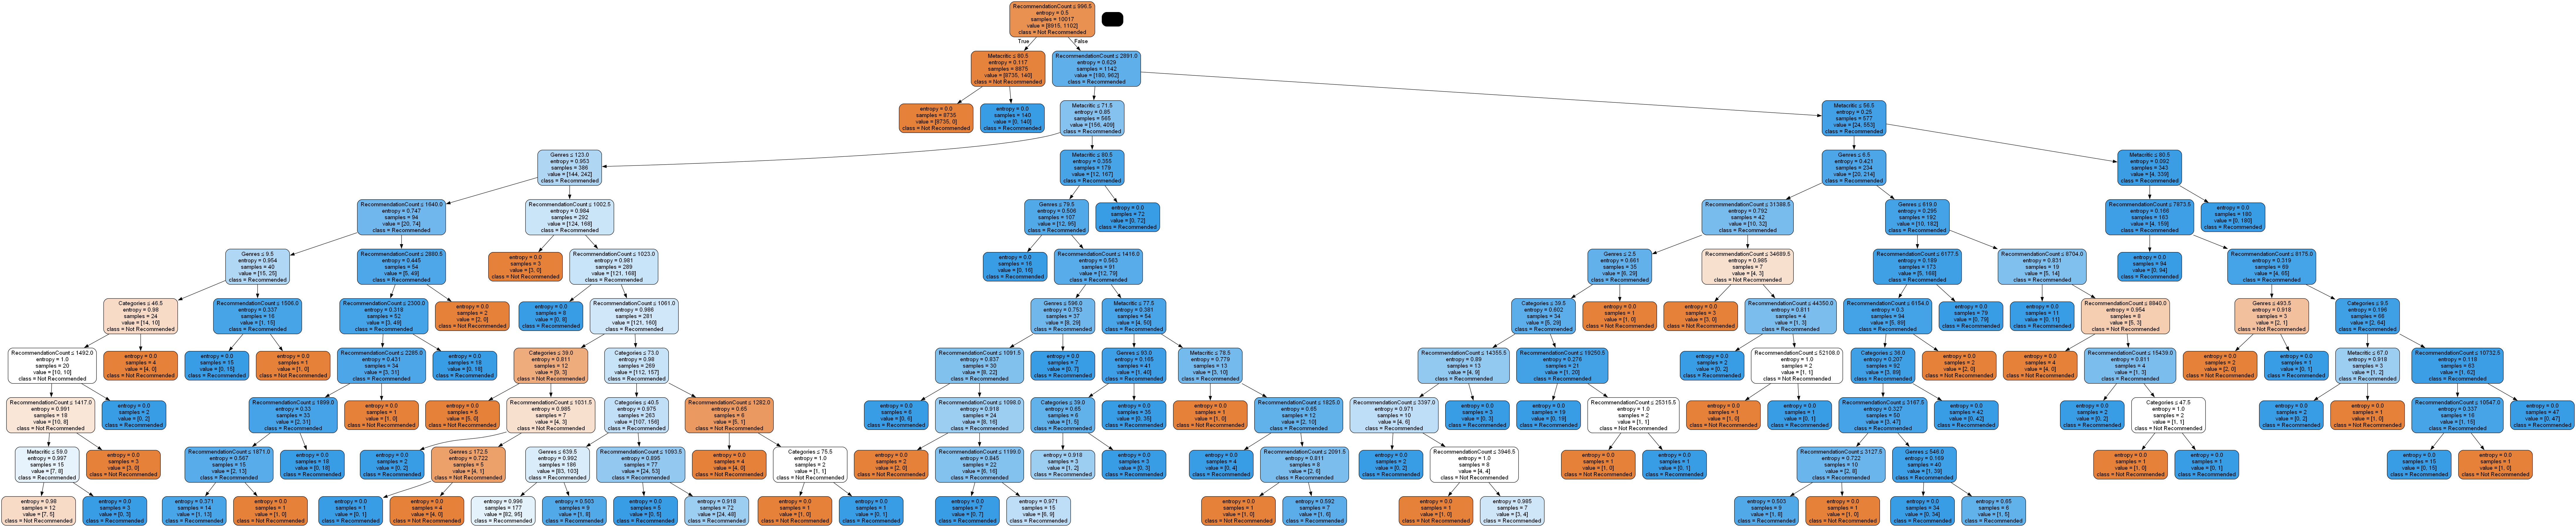

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features1, class_names=['Not Recommended', 'Recommended'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')

Image(graph.create_png())

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2921   47]
 [  11  361]]


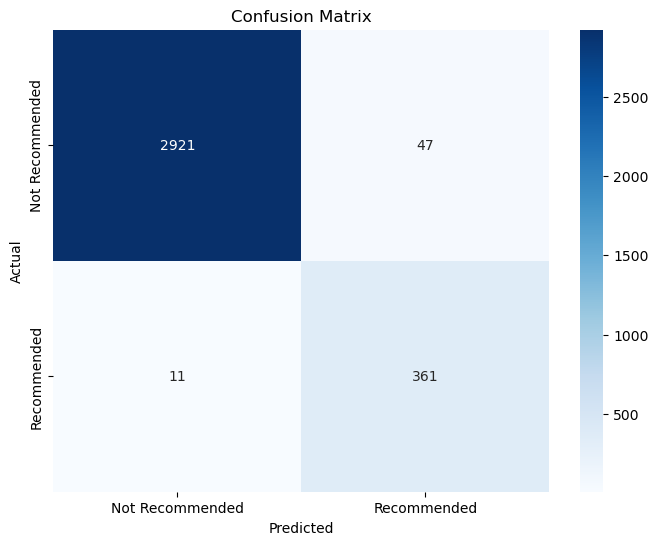

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

features2 = ['Genres', 'Platforms', 'SupportedLanguages', 'SteamSpyOwners', 'SteamSpyPlayersEstimate']  # Features
X2 = dt[features2]
y2 = dt['Recommended']  # Target variable

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

clf2 = DecisionTreeClassifier(criterion="gini", splitter='best', max_depth=5)

clf2.fit(X2_train, y2_train)

predictions = clf2.predict(X2_test)

accuracy = accuracy_score(y2_test, predictions)
precision = precision_score(y2_test, predictions)
recall = recall_score(y2_test, predictions)
f1 = f1_score(y2_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9604790419161676
Precision: 0.8370786516853933
Recall: 0.8010752688172043
F1 Score: 0.8186813186813187


In [14]:
X2_train

,Genres,Platforms,SupportedLanguages,SteamSpyOwners,SteamSpyPlayersEstimate
6415,515,5,49,17218,2511
7890,442,2,2325,3587,2870
8994,641,2,32,2870,2690
11240,666,2,2325,0,0
3033,605,2,2325,20625,10761
...,...,...,...,...,...
11964,308,2,922,10044,6815
5191,219,4,2325,32283,21701
5390,260,2,2325,203024,137202
860,173,2,32,1614,897


In [15]:
X2_test

,Genres,Platforms,SupportedLanguages,SteamSpyOwners,SteamSpyPlayersEstimate
1783,633,2,1142,3133058,1212224
7596,313,5,32,9685,1076
5964,0,5,32,59365,5560
1978,402,4,1118,3102568,2548199
1085,641,2,32,153344,42327
...,...,...,...,...,...
1284,127,2,32,56495,9864
13245,127,2,2325,0,0
8478,313,4,32,669512,643148
6386,658,2,32,7353,4484


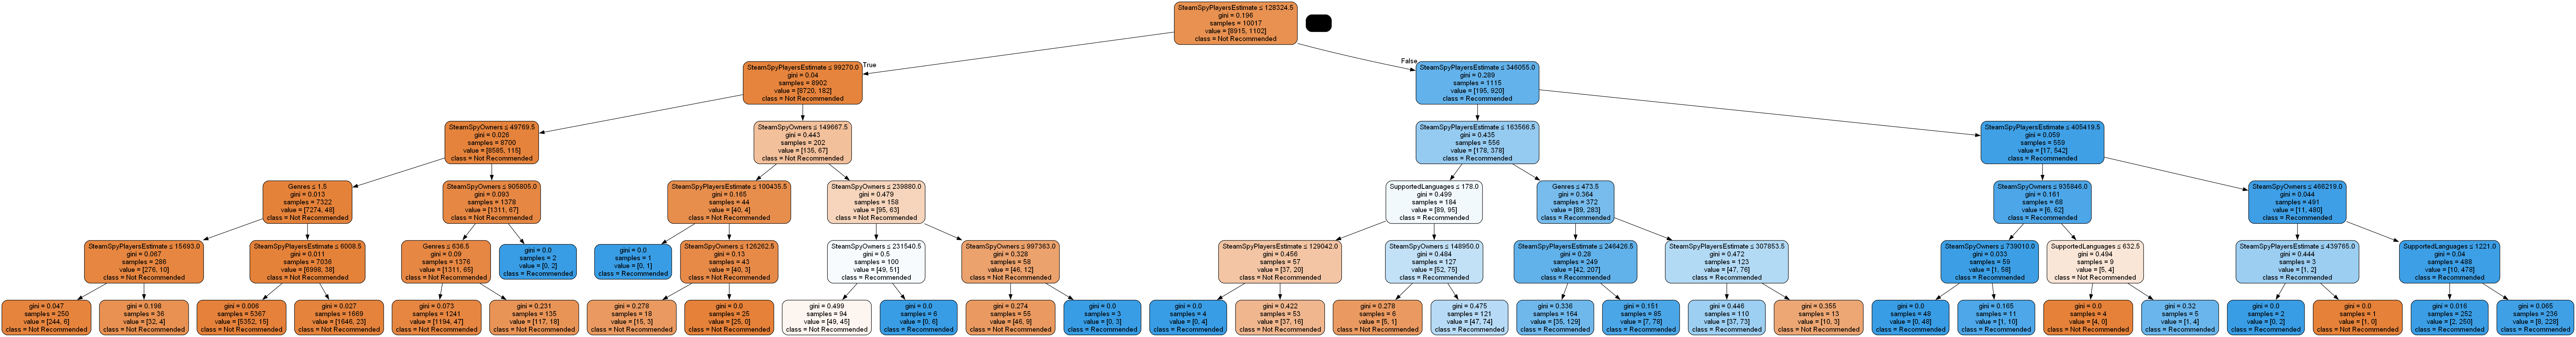

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features2, class_names=['Not Recommended', 'Recommended'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree1.png')

Image(graph.create_png())

In [17]:
from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y2_test, predictions)

print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[2910   58]
 [  74  298]]


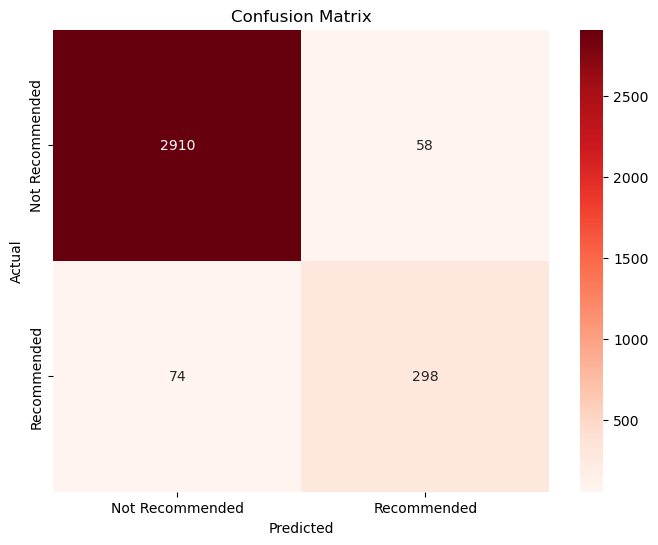

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features3 = ['Categories','Genres', 'Platforms', 'SupportedLanguages', 'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'Metacritic']  # Features
X3 = dt[features3]
y3 = dt['Recommended']  # Target variable

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

clf3 = DecisionTreeClassifier(criterion="log_loss", max_depth=4, splitter='random')

clf3.fit(X3_train, y3_train)

predictions = clf3.predict(X3_test)

accuracy = accuracy_score(y3_test, predictions)
precision = precision_score(y3_test, predictions)
recall = recall_score(y3_test, predictions)
f1 = f1_score(y3_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.938872255489022
Precision: 0.6827956989247311
Recall: 0.8485523385300668
F1 Score: 0.7567030784508442


In [20]:
X3_train

,Categories,Genres,Platforms,SupportedLanguages,SteamSpyOwners,SteamSpyPlayersEstimate,Metacritic
11219,76,666,2,2325,0,0,0
5261,9,220,3,2325,47169,22777,0
12513,32,313,2,32,7891,4484,0
4459,40,515,4,32,32104,13631,0
4963,32,479,4,1240,47707,37663,0
...,...,...,...,...,...,...,...
11964,32,308,2,922,10044,6815,0
5191,32,219,4,2325,32283,21701,0
5390,32,260,2,2325,203024,137202,0
860,32,173,2,32,1614,897,0


In [21]:
X3_test

,Categories,Genres,Platforms,SupportedLanguages,SteamSpyOwners,SteamSpyPlayersEstimate,Metacritic
1783,62,633,2,1142,3133058,1212224,0
7596,32,313,5,32,9685,1076,0
5964,32,0,5,32,59365,5560,0
1978,13,402,4,1118,3102568,2548199,74
1085,9,641,2,32,153344,42327,0
...,...,...,...,...,...,...,...
2676,46,637,2,1845,17935,12734,76
4833,46,220,4,527,18832,3228,0
9338,46,0,2,882,14169,12734,0
8576,9,93,2,38,717,811,0


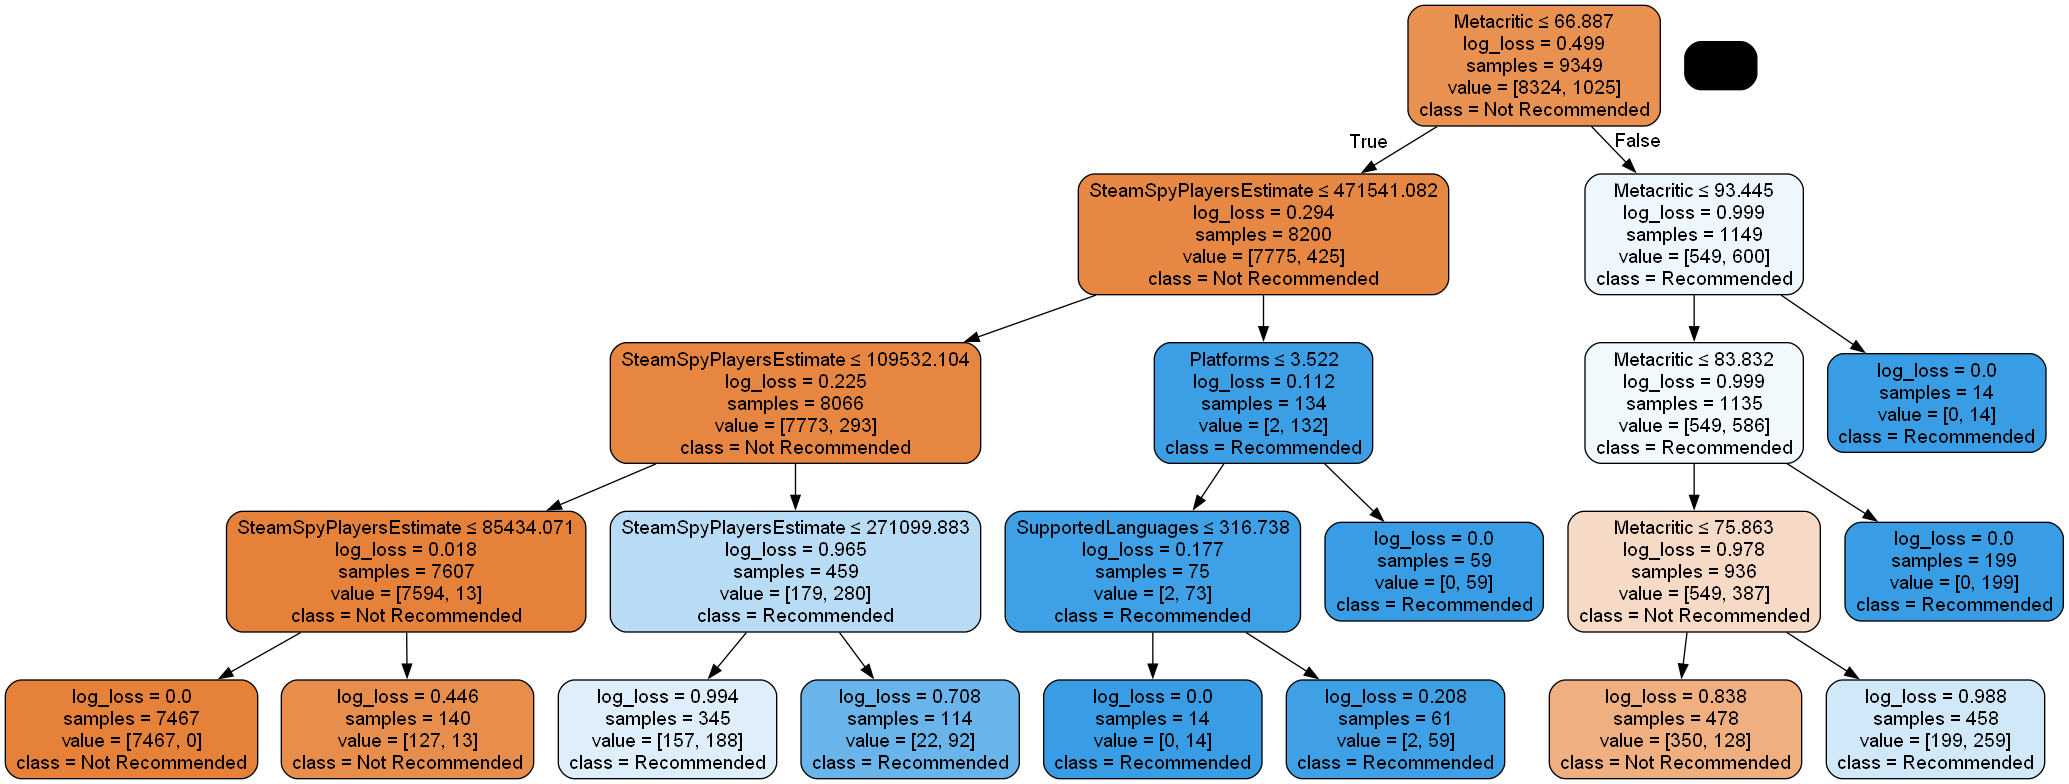

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features3, class_names=['Not Recommended', 'Recommended'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree2.png')

Image(graph.create_png())

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix3 = confusion_matrix(y3_test, predictions)

print("Confusion Matrix:")
print(conf_matrix3)

Confusion Matrix:
[[3382  177]
 [  68  381]]


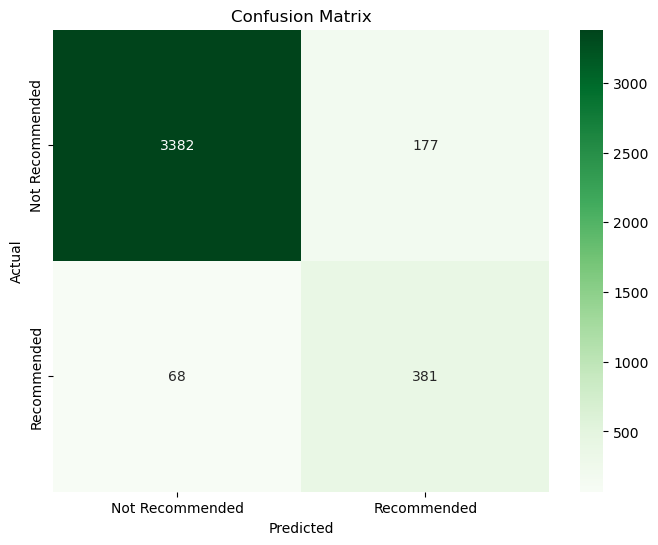

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()